# Задание к хакатону МИФИ 
#### Детектирование и подсчет объектов на видеозаписи с использованием ultralytics YOLO 11



### Предобученная модель YOLO 11 имеет возможность разлчиать объекты следующих классов :

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mouse',
 65: 'remote',
 66: 'keyboard',
 67: 'cell phone',
 68: 'microwave',
 69: 'oven',
 70: 'toaster',
 71: 'sink',
 72: 'refrigerator',
 73: 'book',
 74: 'clock',
 75: 'vase',
 76: 'scissors',
 77: 'teddy bear',
 78: 'hair drier',
 79: 'toothbrush'}
"""

#### Первым случаем применения подсчета объектов является, подсчет количества посетителей в парковых зонах. 

In [4]:
# Импортирование библиотек cv2 и YOLO ultralytics

import cv2
from ultralytics import solutions

In [ ]:
# Пример кода
def count_objects_in_region(video_path, output_video_path, model_path, сlasses_to_count):
    """Count objects in a specific region within a video."""
    cap = cv2.VideoCapture(video_path)
    assert cap.isOpened(), "Error reading video file"

    w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
    video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Точки, описывающие регион, внутри которого осуществляется детектирование и подсчет инстересующих объекутов.
# Данные регион используется в основной функуии ObjectCounter
    region_points = [(270, 430), (700, 430), 
                     (700, 170), (270, 330)]
                     
                   
    counter = solutions.ObjectCounter(show=True, region=region_points, model=model_path, classes = сlasses_to_count )
    
# параметр show = True - выводит видеоизображение во время обработки
    
#Код обработки видео

    while cap.isOpened():
        success, im0 = cap.read()
        if not success:
            print("Video frame is empty or video processing has been successfully completed.")
            break
        im0 = counter.count(im0)
        video_writer.write(im0)

# Код сохранения результатов подсчета
    with open('Z:\YOLO hakaton\Output\Sochi201224park001_countObj.txt', 'w') as file:
    # Перенаправляем вывод print() в файл
        print(counter.classwise_counts, file=file)
    
    
    cap.release()
    video_writer.release()
    cv2.destroyAllWindows()
  


# Список искомых объектов [0 - человек, 1 - велосипед ,2 - машина, 3 - мотоцикл ,15 - кошка ,16 - собака]
count_objects_in_region("Z:\\YOLO hakaton\\Input\\in-Sochi-201224 park001.mkv", "Z:\\YOLO hakaton\\Output\\in-Sochi-201224 park001.avi", "yolo11n.pt", [0,1,2,3,15,16])

Результатом выполнения адгоритма является определение региона, в котором осуществляется подсчет интересующих объектов.
Детектирование, классификация и подсчет объектов осуществляется на протяжении всего видео.

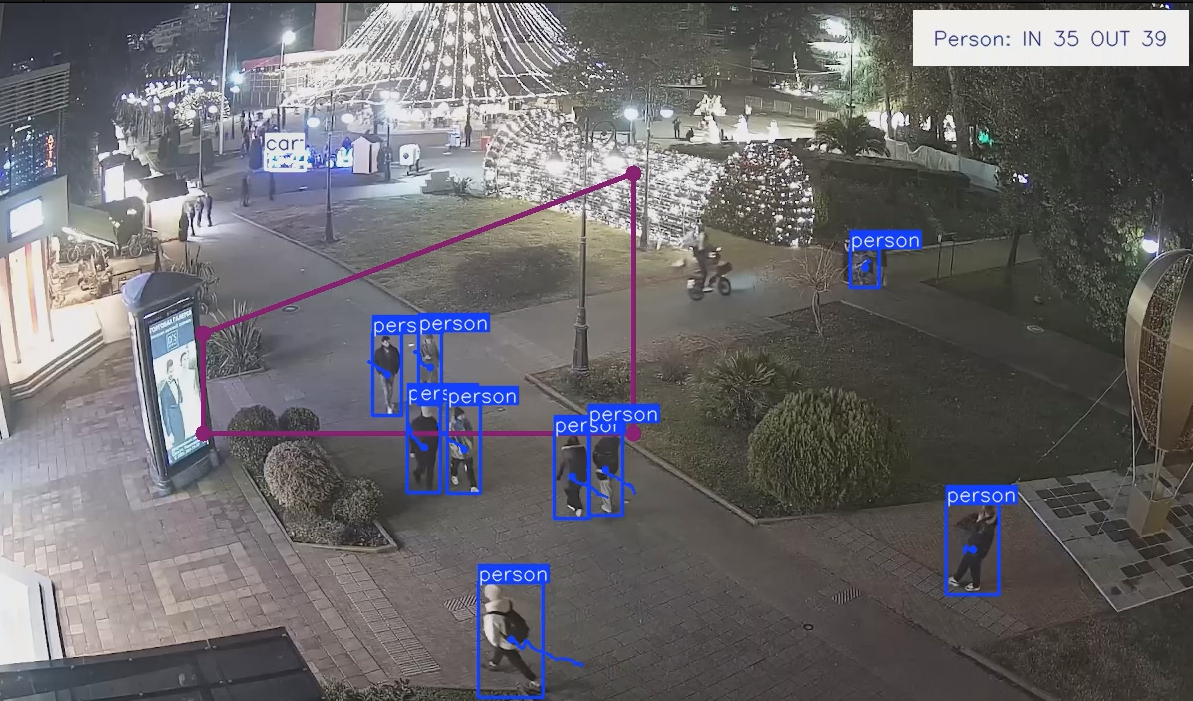

Однако видно, что детекция происходит не всегда. В частности на видео видно присутсвие двухколесного транспортного средства, которое не было детектировано и не попало в счетчик объектов. 

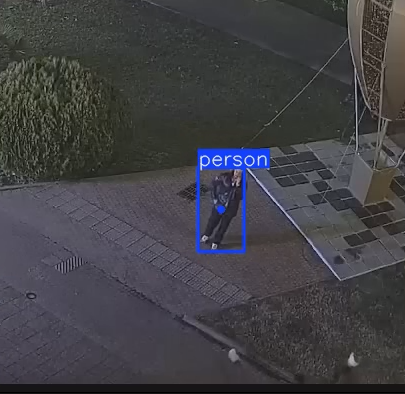

Также видно, что модель не смогла распознать животное в кадре.

Представляетс, что неспособность модели осуществить детекцию, классификацию в раде случае обусловлена в первую очередь низким качеством видеозаписи.



#### Гланвым результатом работы алгоритма является сохраненное количество объектов в интересующей нас области, которое в дальнейшем может быть обработано отдельно.

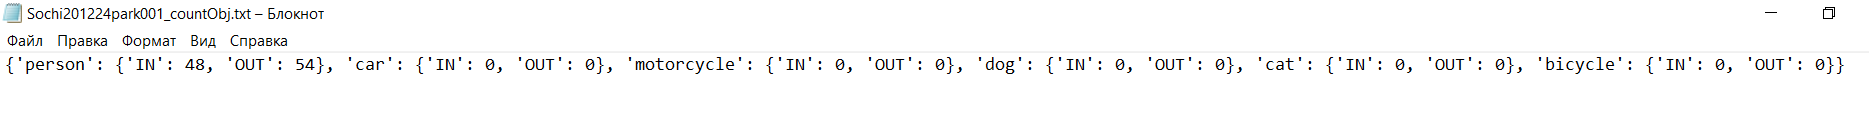

## Следующим примером использования объектов подсчета объектов является определения количества транспортных средств, проходящих ко конкретному участку дорожного полотна или по поверхности отдельных инжинерных сооружений, например мостов.

In [ ]:
# Пример кода
def count_objects_in_region(video_path, output_video_path, model_path, сlasses_to_count):
    """Count objects in a specific region within a video."""
    cap = cv2.VideoCapture(video_path)
    assert cap.isOpened(), "Error reading video file"

    w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
    video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Точки, описывающие регион, внутри которого осуществляется детектирование и подсчет инстересующих объекутов.
# Данные регион используется в основной функуии ObjectCounter
    region_points = [(600, 500), (900, 430), 
                     (900, 300), (600, 330)]
                     
                   
    counter = solutions.ObjectCounter(show=True, region=region_points, model=model_path, classes = сlasses_to_count )
    
# параметр show = True - выводит видеоизображение во время обработки
    
#Код обработки видео

    while cap.isOpened():
        success, im0 = cap.read()
        if not success:
            print("Video frame is empty or video processing has been successfully completed.")
            break
        im0 = counter.count(im0)
        video_writer.write(im0)
        
# Код сохранения результатов подсчета
    with open('Z:\YOLO hakaton\Output\Vologda-171224.mkv_countObj.txt', 'w') as file:
    # Перенаправляем вывод print() в файл
        print(counter.classwise_counts, file=file)
    
    
    cap.release()
    video_writer.release()
    cv2.destroyAllWindows()
  


# Список искомых объектов [1 - велосипед ,2 - машина, 3 - мотоцикл, 5- автобус, 7 - грузовик]
count_objects_in_region("Z:\\YOLO hakaton\\Input\\in-Vologda-171224.mkv", "Z:\\YOLO hakaton\\Output\\out-Vologda-171224.mkv", "yolo11n.pt", [0,1,2,3,5,7])

## Результатом работы алгоритма является подсчет количества каждой категории транспорта в отдельности, пересекающей мост.

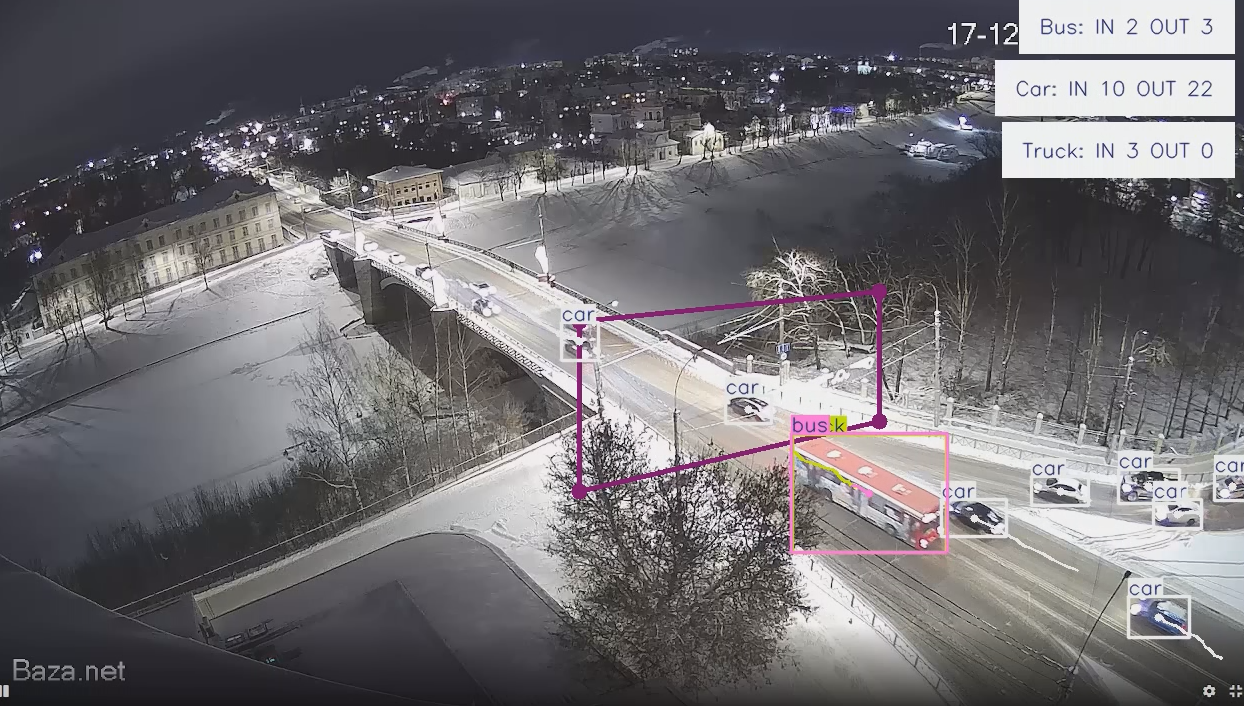

##### Следует отметить, что классификация категории транспорта происходит не всегда корректно, в частности видно, что транспортное средство в кадре было определено и как автобус и как грузовик. Однако подоных случаев сравнительно не много. Низкое качество классификации в ряде случаем может быть обусловлено никзким качеством видеозаписи и темным временем суток.


### Как и в предыдущем примере данные о каждой категории транспорта сохранены в отдельный файл и могут быть подвергнуты дальнейшей обработке.
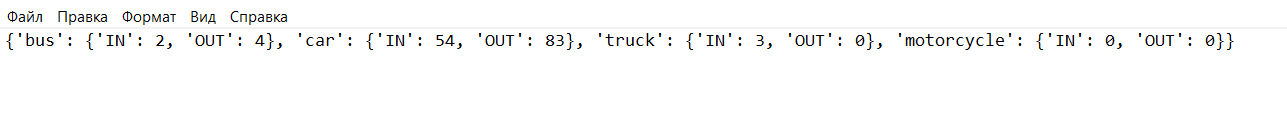

In [ ]:
def count_objects_in_region(video_path, output_video_path, model_path, сlasses_to_count):
    """Count objects in a specific region within a video."""
    cap = cv2.VideoCapture(video_path)
    assert cap.isOpened(), "Error reading video file"

    w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
    video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Точки, описывающие регион, внутри которого осуществляется детектирование и подсчет инстересующих объекутов.
# Данные регион используется в основной функуии ObjectCounter
    region_points = [(200, 170), (930, 300), 
                     (900, 530), (230, 530)]
                     
                   
    counter = solutions.ObjectCounter(show=True, region=region_points, model=model_path, classes = сlasses_to_count )
    
# параметр show = True - выводит видеоизображение во время обработки
    
#Код обработки видео

    while cap.isOpened():
        success, im0 = cap.read()
        if not success:
            print("Video frame is empty or video processing has been successfully completed.")
            break
        im0 = counter.count(im0)
        video_writer.write(im0)
        
# Код сохранения результатов подсчета
    with open('Z:\YOLO hakaton\Output\in-Sochi-181224 road 001.txt', 'w') as file:
    # Перенаправляем вывод print() в файл
        print(counter.classwise_counts, file=file)
    
    
    cap.release()
    video_writer.release()
    cv2.destroyAllWindows()
  


# Список искомых объектов [1 - велосипед ,2 - машина, 3 - мотоцикл, 5- автобус, 7 - грузовик]
count_objects_in_region("Z:\\YOLO hakaton\\Input\\in-Sochi-181224 road 001.mkv", "Z:\\YOLO hakaton\\Output\\out-Sochi-181224 road 001.avi", "yolo11n.pt", [0,1,2,3,5,7])

### Результат работы алгоритма 
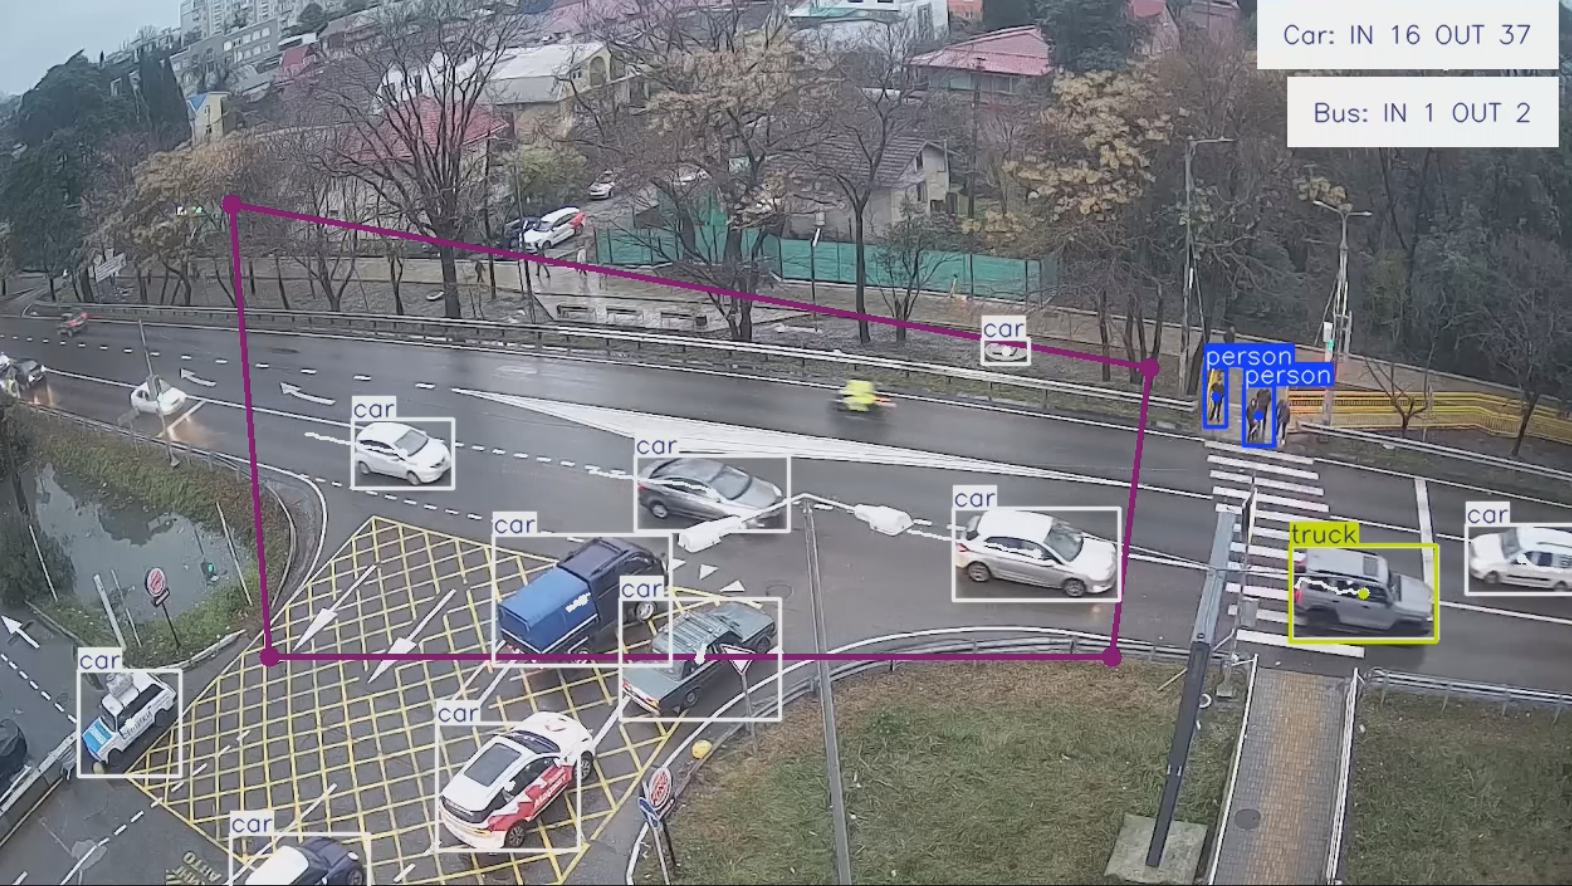

#### Однако видно, что маодель не смогла определеить мотоцикл в качестве транспортного стредства. Вероятно это связано с размытием объекта во время движения.

### Количество подсчитанных объектов сгрупировано по категориям и сохранено в отдельный файл :
{'car': {'IN': 44, 'OUT': 93}, 'bus': {'IN': 1, 'OUT': 3}, 'truck': {'IN': 1, 'OUT': 2}, 'person': {'IN': 0, 'OUT': 0}}

# Выводы: практическое применение, недостатки, направления развития.

### Практическое применение

Логическим развитием идеии учета количества одельной категории транспортных средств на участке дорожного полотна является его сопосталвением с массой каждого транспортного средства с целью получения данных о нагрузке на участок дорожного покрытия или инженерного сооружения (напрмер моста), за изучаемый интервал. Обычное наружное наблюение, используемое в демонстрации, представлятся не достаточным, так как вес каждого транспортного средства может не может быть точно определен, а может быть получен из неких зарнее устанволенных табличных значений. Решением данной проблемы является использование камер считывающих номер транспортного средства, посредством которого из единой базы данным МВД РФ могут быть получены сведения о массе транспортного средства, заявленного в техенической документации при его регистрации. Кроме того, представляетяс возможным учитывать не только массу автомобиля, но и его скорость на конкретном участке, чтобы можно было расчитать степень физического воздействия на дорожное полотно.

Данные о количестве посетителей в парковой зоне могут указывать администарции на время суток, в которе достигается пиковое значение посетителей с указанием конкретных участков. На основании данных могут быть приняты решения о местах размещения наружной рекламы, дополнительных объектов инфраструктуры (например туалтеов или урн для муссора). Кроме того, указанные данные могут быть предоставлены малому бизнесу для возможной установки точек малой розниченой торговли. 

### Недостатки
При исследовании модели YOLO выявлены недостатки при детектировании объектов в ряде случаем, что объясняетяс низким качеством обрабатываемого изображения.

### Напралвения развития
В случае построения полноценного решения на базе исследуемой модели следует добавить следующий функционал.
- Возможность наложения областей контроля при помощи установления точек вручуню непосредственно на изображении;
- Выведение более подробной информации о нагрузке на участок дороги;


